In [ ]:
import os

if not os.getcwd().endswith("src"):
    %cd ..
%pwd

'/home/xqz-u/master/FACT/FACT/src'

In [ ]:
import dataclasses
import pprint

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

import config
import ocef
import sources_of_envy

/home/xqz-u/py_envs/FACT/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/xqz-u/py_envs/FACT/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [ ]:
conf = config.Configuration(
    datasets=["lastfm", "movielens"],
    # datasets=["movielens"],
    lastfm_ground_truth_file=config.LASTFM_RECOMMENDER_DIR / "model_ground_truth.npz",
    lastfm_recommender_dir=config.LASTFM_RECOMMENDER_DIR,
    movielens_ground_truth_file=config.MOVIELENS_RECOMMENDER_DIR
    / "model_ground_truth.npz",
    movielens_recommender_dir=config.MOVIELENS_RECOMMENDER_DIR,
    lastfm_ground_truth_model="ALS",
    movielens_ground_truth_model="ALS",
    lastfm_recommender_model="ALS",
    movielens_recommender_model="ALS",
    # NOTE point ocef_dir to the folder with your ocef results, default is
    # FACT/results_ocef
    # ocef_dir=...
)
pprint.pprint(dataclasses.asdict(conf))

{'assets_root_dir': PosixPath('..'),
 'datasets': ['lastfm', 'movielens'],
 'epsilon': 0.05,
 'evaluation_k': 40,
 'experiment': None,
 'ground_truth_files': {'lastfm': PosixPath('../lastfm/models/model_ground_truth.npz'),
                        'movielens': PosixPath('../movielens/models/model_ground_truth.npz')},
 'ground_truth_models': {'lastfm': <class 'recommender_models.ALS'>,
                         'movielens': <class 'recommender_models.ALS'>},
 'lastfm_ground_truth_file': PosixPath('../lastfm/models/model_ground_truth.npz'),
 'lastfm_ground_truth_model': <class 'recommender_models.ALS'>,
 'lastfm_recommender_dir': PosixPath('../lastfm/models'),
 'lastfm_recommender_model': <class 'recommender_models.ALS'>,
 'lastfm_topk_artists': 2500,
 'model_base_name': 'model',
 'movielens_ground_truth_file': PosixPath('../movielens/models/model_ground_truth.npz'),
 'movielens_ground_truth_model': <class 'recommender_models.ALS'>,
 'movielens_recommender_dir': PosixPath('../movielens/mod

In [ ]:
ocef.main(conf)

Plot using existing files from ../results_ocef...


FileNotFoundError: [Errno 2] No such file or directory: '../results_ocef/problem1.txt'

In [ ]:
metrics = sources_of_envy.envy_from_misspecification(conf)

In [ ]:
df = pd.concat(
    [pd.DataFrame(vals).assign(dataset=dataset) for dataset, vals in metrics.items()]
)
df

,mean_envy,prop_eps_envy,dataset
64,0.004817,0.009514,lastfm
256,0.010771,0.058668,lastfm
4,0.012304,0.003171,lastfm
8,0.011532,0.001586,lastfm
128,0.003560,0.012156,lastfm
32,0.003798,0.001057,lastfm
2,0.009717,0.001057,lastfm
1,0.011642,0.000000,lastfm
16,0.006858,0.003171,lastfm
64,0.001691,0.000000,movielens


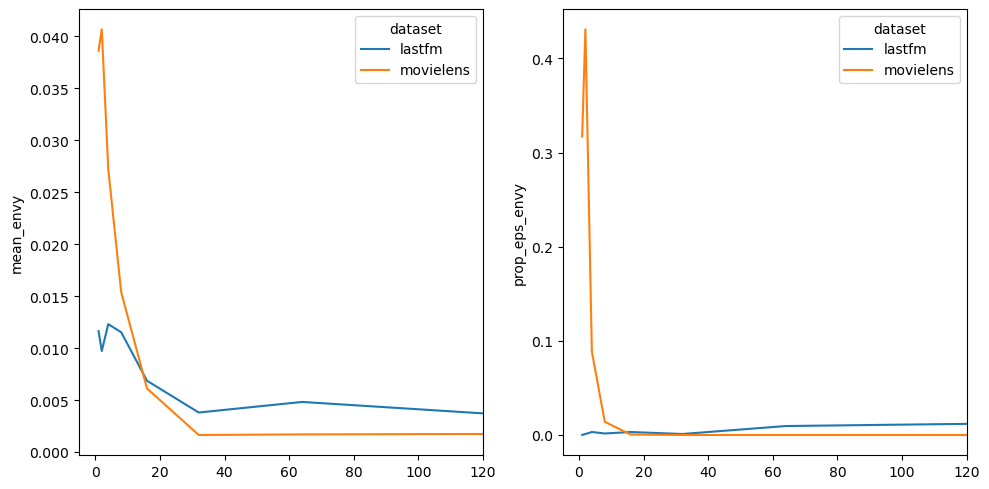

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# NOTE if you uncomment this, you can see that results for lastfm are
# (kind of) in line with the paper, while movielens screws big time
# df = og_df[og_df["dataset"] == "lastfm"]
# sns.pointplot(data=df, x=df.index, y="mean_envy", hue="dataset", linestyles=["-", "--"], ax=axes[0])
sns.lineplot(data=df, x=df.index, y="mean_envy", hue="dataset", ax=axes[0])
axes[0].set_xlim(-5, 120)
# sns.pointplot(data=df, x=df.index, y="prop_eps_envy", hue="dataset", linestyles=["-", "--"], ax=axes[1])
sns.lineplot(data=df, x=df.index, y="prop_eps_envy", hue="dataset", ax=axes[1])
axes[1].set_xlim(-5, 120)
plt.tight_layout()